In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# read the csv file
df = pd.read_csv('discussion-gpt-4-no-repo-structure.csv')

# Remove rows with syntax column other than valid and invalid
df = df[df['Syntax_Check'].isin(['Valid', 'Invalid'])]

# Replace empty DevOps_Aware_Score with 0
df['DevOps_Aware_Score'] = df['DevOps_Aware_Score'].fillna(0)

In [5]:
df

,Index,GitHub_Repo_Link,GitHub_Build_Pipeline_File_Content,Generated_Build_Pipeline_File_Content,Exact_Match_Score,BLEU_Score,Syntax_Check,DevOps_Aware_Score,Language,Syntax_Check_Count_Valid,Syntax_Check_Count_Invalid
0,393,https://github.com/subhra74/xdm,"name: .NET\n\non:\n push:\n branches: [ ""m...",name: Build & Test Application\n\non:\n push:...,0.281992,0.476419,Valid,0.332359,C#,2,1
1,1004,https://github.com/webbju/android-plus-plus,name: CI\n\non:\n\n push:\n branches: [ ma...,"name: CI\n\non: [push, pull_request]\n\njobs:\...",0.364621,0.604999,Valid,0.717045,C#,3,0
2,1038,https://github.com/logosbible/bsdiff.net,"name: Build\n\non: [push, pull_request]\n\nenv...",name: .NET Core CI\n\non:\n push:\n branch...,0.131950,0.501313,Valid,0.472172,C#,3,0
3,1039,https://github.com/lithander/minimal-bitcoin-m...,name: MSBuild\n\non: [push]\n\nenv:\n # Path ...,"name: Build and Test\n\non: [push, pull_reques...",0.108045,0.291500,Valid,0.612785,C#,3,0
4,1040,https://github.com/geri-borbas/triangle.net,name: .NET\n\non:\n push:\n branches: [ ma...,name: Build and Test\n\non:\n push:\n bran...,0.442727,0.539546,Valid,0.767959,C#,3,0
...,...,...,...,...,...,...,...,...,...,...,...
135,3354,https://github.com/vercel/uid-promise,name: CI\n\non:\n push:\n branches: ['main...,name: Build and Test\n\non:\n push:\n bran...,0.205286,0.369294,Valid,0.941176,TypeScript,3,0
136,3355,https://github.com/tb/ng2-nouislider,name: CI\n\non:\n push:\n branches: [maste...,name: Build and Test\n\non:\n push:\n bran...,0.423029,0.549208,Valid,0.941176,TypeScript,3,0
137,3356,https://github.com/chenshenhai/pictool,# This workflow will do a clean install of nod...,name: Build and Test\n\non:\n push:\n bran...,0.161037,0.187249,Valid,1.000000,TypeScript,3,0
138,3357,https://github.com/sfeir-open-source/angular-s...,name: Azure Static Web Apps CI/CD\n\non:\n pu...,name: Build and Test\n\non:\n push:\n bran...,0.053275,0.205738,Valid,0.320000,TypeScript,3,0


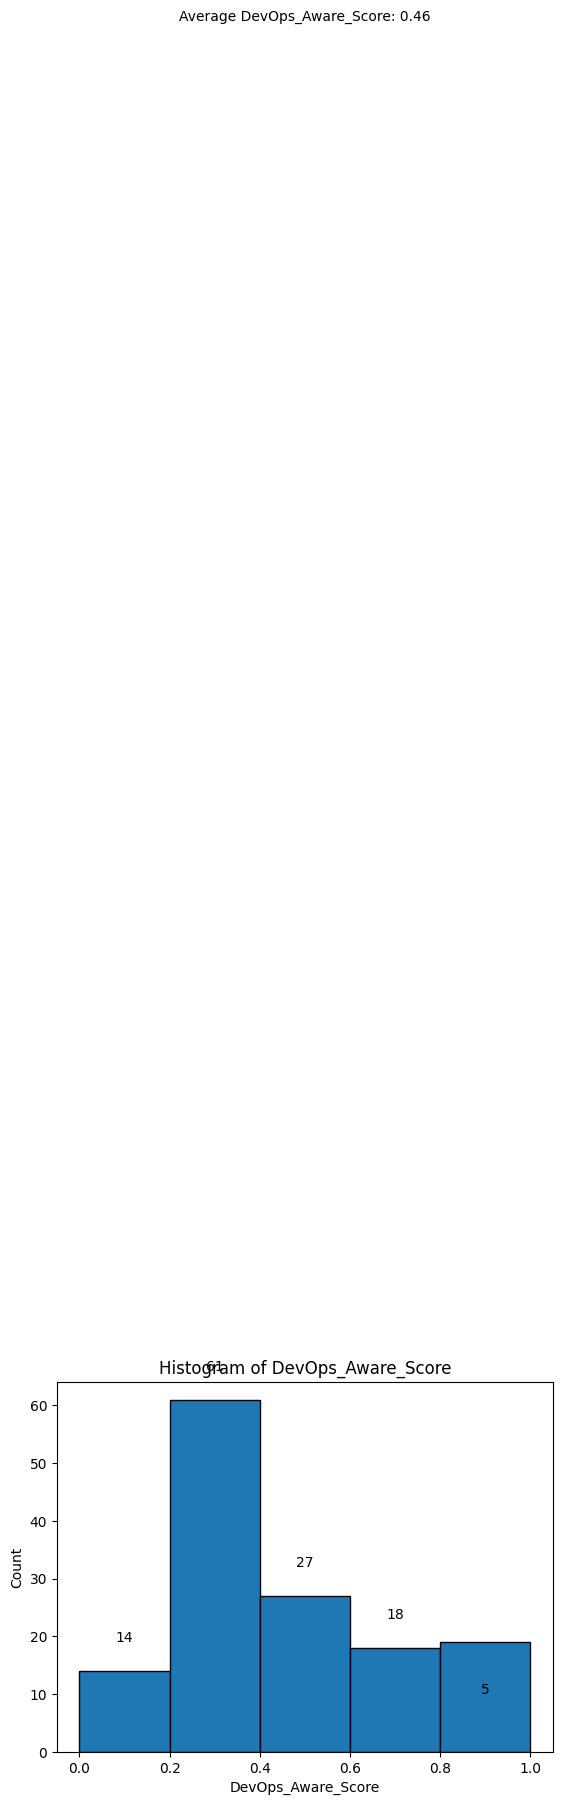

In [6]:
# create histogram
plt.hist(df['DevOps_Aware_Score'], bins=5, range=(0, 1), edgecolor='black')

# set labels and title
plt.xlabel('DevOps_Aware_Score')
plt.ylabel('Count')
plt.title('Histogram of DevOps_Aware_Score')

# show count on top of each histogram
for i in range(5):
    count = len(df[(df['DevOps_Aware_Score'] >= i*0.2) & (df['DevOps_Aware_Score'] < (i+1)*0.2)])
    plt.text(i*0.2+0.1, count+5, str(count), ha='center')
    
# Print average DevOps_Aware_Score on top of the histogram
plt.text(0.5, 300, 'Average DevOps_Aware_Score: ' + str(round(df['DevOps_Aware_Score'].mean(), 2)), ha='center')

# show the plot
plt.show()

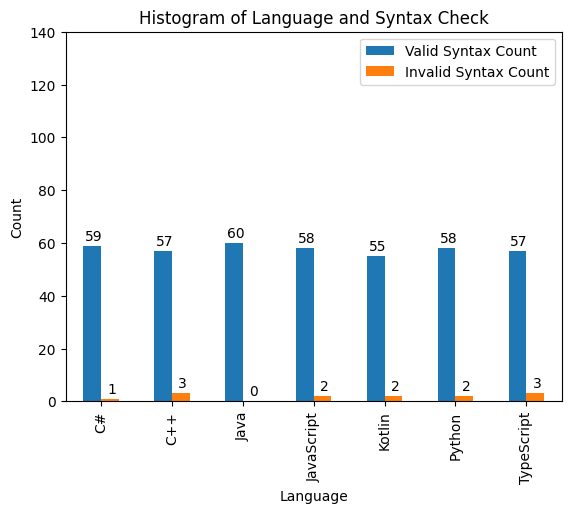

In [7]:
# Group the data by language and syntax check
grouped_data = df.groupby(['Language']).agg({'Syntax_Check_Count_Valid': 'sum', 'Syntax_Check_Count_Invalid': 'sum'})


# Plot histogram with multibar plot for each language and syntax check combination
ax = grouped_data.plot(kind='bar', stacked=False)

# Add count on top of each bar in the histogram, replace NaN or infinities with 0
for i, (lang, counts) in enumerate(grouped_data.items()):
    for j, count in enumerate(counts):
        if pd.isna(count) or count == float('inf') or count == float('-inf') or count != count:
            count = 0
        plt.text(i * 0.25 + j - 0.1, count + 1, str(int(count)), ha='center', va='bottom')

# Set labels and title
plt.xlabel('Language')
plt.ylabel('Count')
plt.title('Histogram of Language and Syntax Check')

# Get handles and labels for the legend
handles, labels = ax.get_legend_handles_labels()

# Create legend with custom labels and adjust position
plt.legend(handles, ["Valid Syntax Count", "Invalid Syntax Count"], loc='upper right')
ax.set_ylim([0, grouped_data.max().max() + 80])
# Show the plot
plt.show()

In [8]:
# Calculate the total count of valid and invalid syntax for each language
total_counts = grouped_data['Syntax_Check_Count_Valid'] + grouped_data['Syntax_Check_Count_Invalid']

# Calculate the percentage of valid syntax for each language
valid_percentage = (grouped_data['Syntax_Check_Count_Valid'] / total_counts) * 100

# Print the percentage of valid syntax for each language
for language, percentage in valid_percentage.items():
    print(f"Percentage of valid syntax for {language}: {percentage:.2f}%")

overall_percentage = (grouped_data['Syntax_Check_Count_Valid'].sum() / total_counts.sum()) * 100

print(f"Overall percentage of valid syntax: {overall_percentage:.2f}%")

Percentage of valid syntax for C#: 98.33%
Percentage of valid syntax for C++: 95.00%
Percentage of valid syntax for Java: 100.00%
Percentage of valid syntax for JavaScript: 96.67%
Percentage of valid syntax for Kotlin: 96.49%
Percentage of valid syntax for Python: 96.67%
Percentage of valid syntax for TypeScript: 95.00%
Overall percentage of valid syntax: 96.88%


Average Exact_Match_Score 0.17
Average BLEU Score 0.36


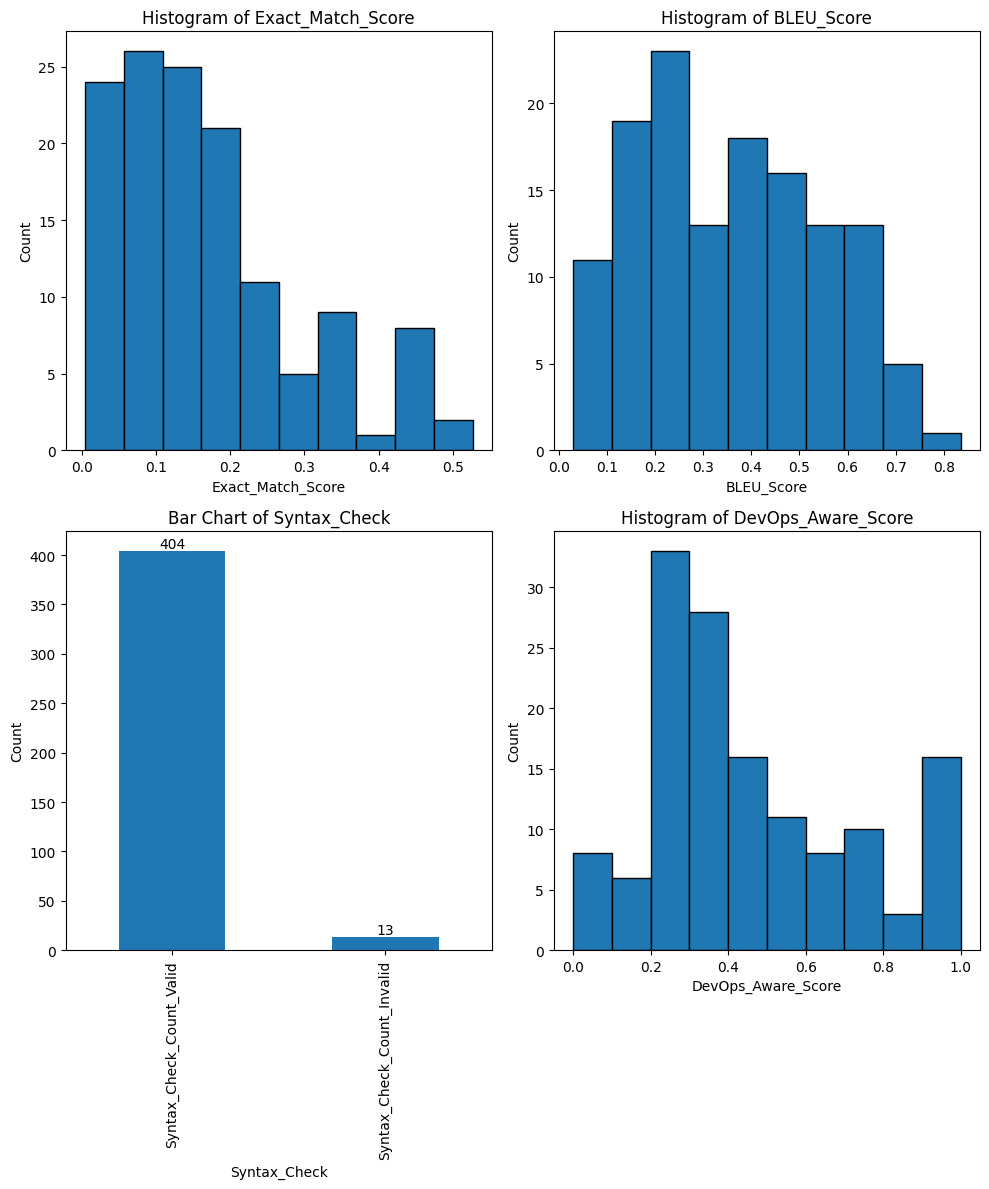

In [9]:
# Set a larger figure size
plt.figure(figsize=(10, 12))


print("Average Exact_Match_Score", round(df['Exact_Match_Score'].mean(), 2))
# Plot histogram of Exact_Match_Score
plt.subplot(2, 2, 1)
plt.hist(df['Exact_Match_Score'], bins=10, edgecolor='black')
plt.xlabel('Exact_Match_Score')
plt.ylabel('Count')
plt.title('Histogram of Exact_Match_Score')

print("Average BLEU Score", round(df['BLEU_Score'].mean(), 2))
# Plot histogram of BLEU_Score
plt.subplot(2, 2, 2)
plt.hist(df['BLEU_Score'], bins=10, edgecolor='black')
plt.xlabel('BLEU_Score')
plt.ylabel('Count')
plt.title('Histogram of BLEU_Score')


# Plot bar chart of Syntax_Check
plt.subplot(2, 2, 3)
syntax_check_counts = df[["Syntax_Check_Count_Valid", "Syntax_Check_Count_Invalid"]].sum()
syntax_check_counts.plot(kind='bar')
plt.xlabel('Syntax_Check')
plt.ylabel('Count')
plt.title('Bar Chart of Syntax_Check')

# Add count on top of each bar
for i in range(len(syntax_check_counts)):
    count = syntax_check_counts.iloc[i]
    plt.text(i, count, str(count), ha='center', va='bottom')

# Plot histogram of DevOps_Aware_Score
plt.subplot(2, 2, 4)
plt.hist(df['DevOps_Aware_Score'], bins=10, edgecolor='black')
plt.xlabel('DevOps_Aware_Score')
plt.ylabel('Count')
plt.title('Histogram of DevOps_Aware_Score')



# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

<Figure size 1200x800 with 0 Axes>

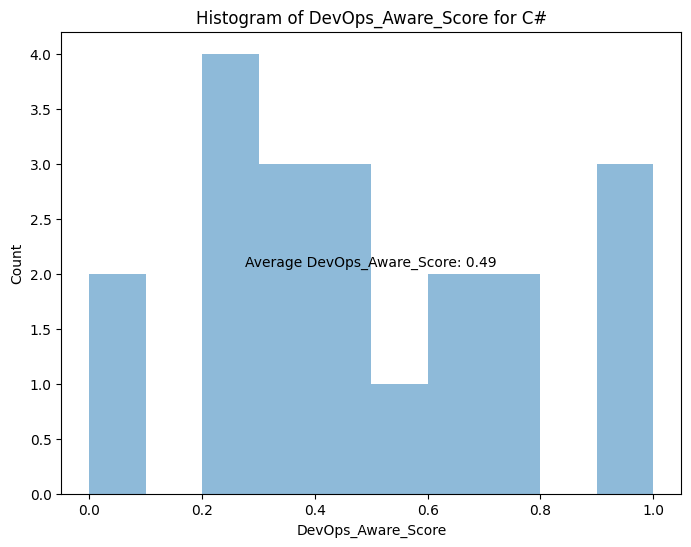

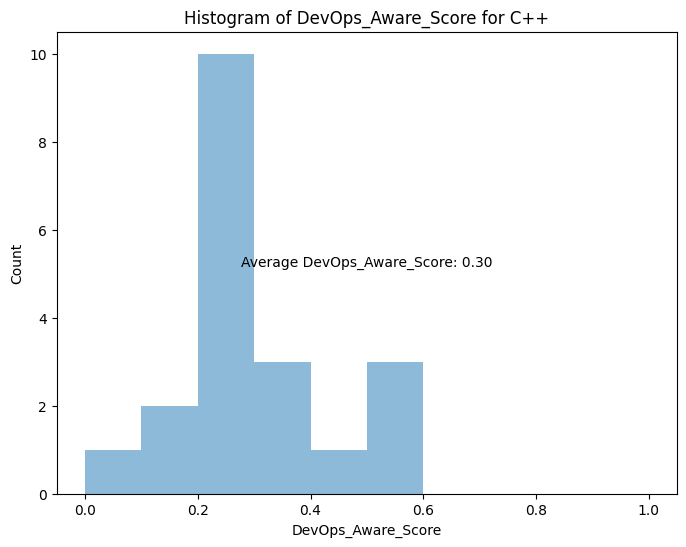

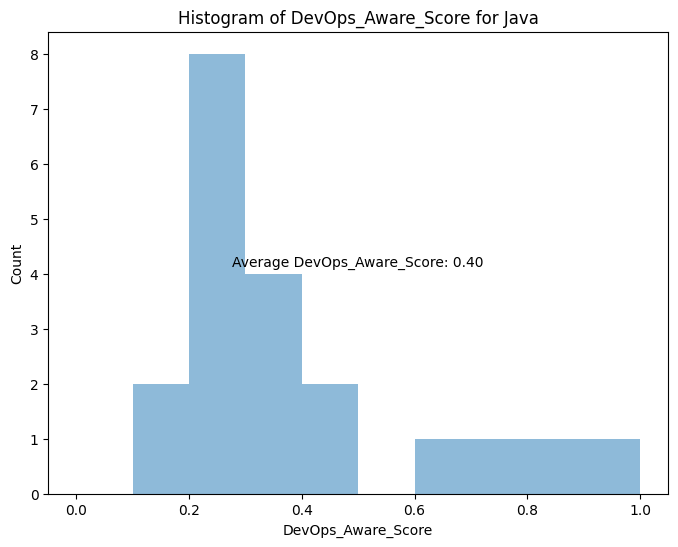

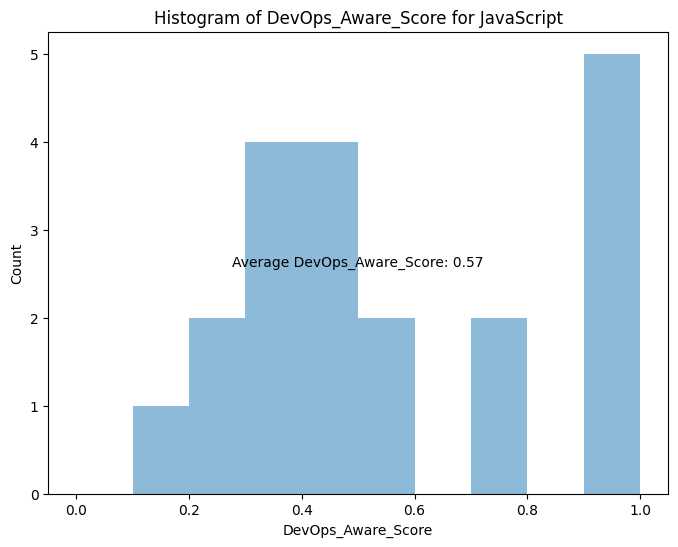

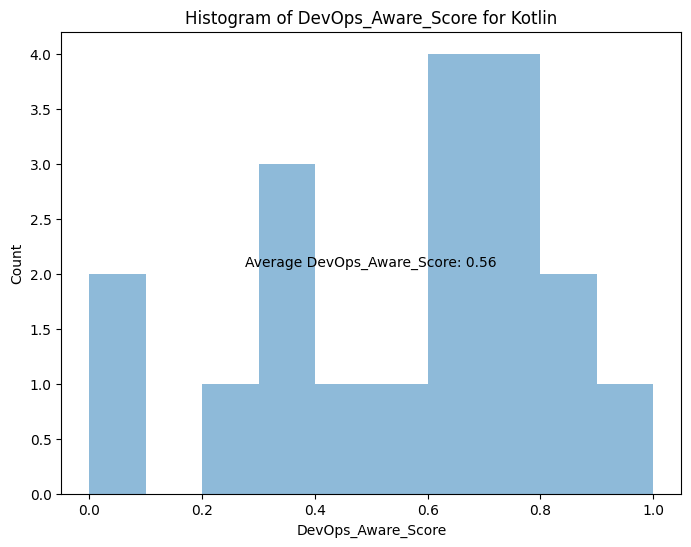

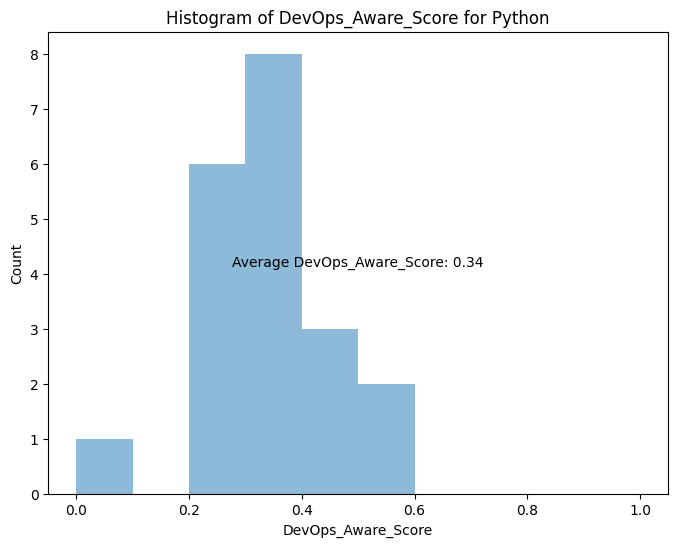

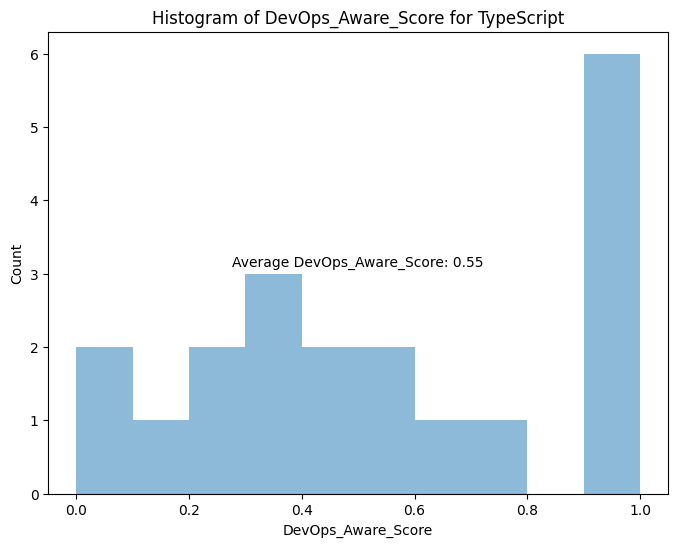

In [10]:
grouped_data = df.groupby('Language')

# Set a larger figure size
plt.figure(figsize=(12, 8))

# Iterate over each group and create a separate plot for each language
for language, group in grouped_data:
    # Create a new figure for each language
    plt.figure(figsize=(8, 6))
    
    # Plot histogram for the current language
    plt.hist(group['DevOps_Aware_Score'], bins=10, range=(0, 1), alpha=0.5)
    
    # Print average DevOps_Aware_Score for the current language on the plot
    plt.text(0.5, 0.5, f'Average DevOps_Aware_Score: {group["DevOps_Aware_Score"].mean():.2f}', ha='center', va='center', transform=plt.gca().transAxes)
    
    # Set labels and title for the current plot
    plt.xlabel('DevOps_Aware_Score')
    plt.ylabel('Count')
    plt.title(f'Histogram of DevOps_Aware_Score for {language}')
    
    # Show the plot for the current language
    plt.show()

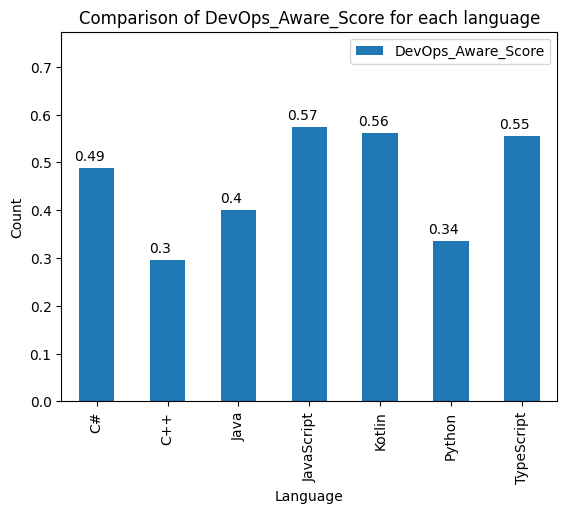

In [11]:
# Group the data by language and syntax check
grouped_data = df.groupby(['Language']).agg({'DevOps_Aware_Score': 'mean'})


# Plot histogram with multibar plot for each language and syntax check combination
ax = grouped_data.plot(kind='bar', stacked=False,)

# Add count on top of each bar in the histogram, replace NaN or infinities with 0
for i, (lang, score) in enumerate(grouped_data.items()):
    for j, score in enumerate(score):

        plt.text(i * 0.25 + j - 0.1, score + 0.01, str(round(score, 2)), ha='center', va='bottom')

# Set labels and title
plt.xlabel('Language')
plt.ylabel('Count')
plt.title('Comparison of DevOps_Aware_Score for each language')
ax.set_ylim([0, grouped_data.max().max() + 0.2])
# Show the plot
plt.show()